IMPORTING LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

LOADING THE DATASET

In [2]:
dataset_path="E:/final year project/dataset"
dataset_map="E:/final year project/dataset/speech_emotion_recognisition.csv"
if not os.path.exists(dataset_map):
    print("Data csv file couldnt be loaded")
elif not os.path.exists(dataset_path):
    print("Data couldn't be loaded")
else:
    print("Data loaded succesfully")

Data loaded succesfully


In [3]:
speech_df=pd.read_csv(dataset_map)
speech_df=speech_df[speech_df['Emotion']!='Surprised']
speech_df=speech_df[speech_df['Emotion']!='Calm']
speech_df = speech_df.drop(speech_df.columns[0], axis=1)
print(speech_df)

      Emotion                  Filename
0       Angry       1001_DFA_ANG_XX.wav
1     Disgust       1001_DFA_DIS_XX.wav
2        Fear       1001_DFA_FEA_XX.wav
3       Happy       1001_DFA_HAP_XX.wav
4     Neutral       1001_DFA_NEU_XX.wav
...       ...                       ...
8869  Disgust  03-01-07-01-02-02-24.wav
8870  Disgust  03-01-07-02-01-01-24.wav
8871  Disgust  03-01-07-02-01-02-24.wav
8872  Disgust  03-01-07-02-02-01-24.wav
8873  Disgust  03-01-07-02-02-02-24.wav

[8498 rows x 2 columns]


FEATURE EXTRACTION

DEFINING FUNCTION FO ZCR

In [4]:
def get_zcr(y,frame_length, hop_length,maxlen):
    zcr=librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)
    return pad_sequences([zcr.T], maxlen=maxlen,truncating="post",padding="post")
# y,sr =librosa.load("E:/final year project/dataset/Calm/03-01-02-01-01-01-01.wav")
# print(y)
# zcr=get_zcr(y=y,frame_length=2048,hop_length=512,maxlen=130)
# print(zcr.shape)

DEFINING FUNCTION FOR RMS ENERGY

In [5]:
def get_rms(y,frame_length, hop_length,maxlen):
    rms=librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
    return pad_sequences([rms.T], maxlen=maxlen,truncating="post",padding="post")

# rms=get_rms(y=y,frame_length=2048,hop_length=512,maxlen=130)
# print(rms.shape)

DEFINING FUNCTION FOR MFCC

In [6]:
def get_mfcc(y,sr,n_mfcc,hop_length,maxlen):
    mfcc=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc,hop_length=hop_length)
    return pad_sequences([mfcc.T], maxlen=maxlen,truncating="post",padding="post")
# mfcc=get_mfcc(y=y,sr=16000,n_mfcc=13,hop_length=512,maxlen=130)
# print(mfcc.shape)


DEFINING MELSPECTOGRAM FUNCTION

In [ ]:
def get_melspec(y,sr,n_fft,n_mels,hop_length,fmin,maxlen):
    mel_spec=librosa.feature.melspectrogram(y=y,sr=sr,n_fft=n_fft,n_mels=n_mels,hop_length=hop_length,fmin=fmin)
    mel_spec_db=librosa.power_to_db(mel_spec,ref=np.max)
    return pad_sequences(mel_spec_db,maxlen=maxlen,truncating="post",padding="post")
# mel_spec_db=get_melspec(y,sr,1024,64,512,50,130)
# print(mel_spec_db.shape)

COLLECTING THE FEATURES

In [8]:
# Defining the params value
FRAME_LENGTH=2048
HOP_LENGTH=512
N_MFCC=13
N_FFT=1024
MAX_LENGTH=130
N_MELS=128
FMIN=50
zcr_list=[]
rmse_list=[]
mfcc_list=[]
mel_spec_list=[]
labels=[]
# Iterating over each row
for index, row in speech_df.iterrows():
    path=os.path.join(dataset_path,row['Emotion'],row['Filename'])
    y,sr=librosa.load(path)
    # zcr=get_zcr(y,FRAME_LENGTH,HOP_LENGTH,MAX_LENGTH)
    # zcr_list.append(zcr)
    # rmse=get_rms(y,FRAME_LENGTH,HOP_LENGTH,MAX_LENGTH)
    # rmse_list.append(rmse)
    mfcc=get_mfcc(y,sr,N_MFCC,HOP_LENGTH,MAX_LENGTH)
    mfcc_list.append(mfcc)
    mel_spec=get_melspec(y,sr,N_FFT,N_MELS,HOP_LENGTH,FMIN,MAX_LENGTH)
    mel_spec_list.append(mel_spec)
    labels.append(row['Emotion'])
    print("Values calculated for ",index)

    


Values calculated for  0
Values calculated for  1
Values calculated for  2
Values calculated for  3
Values calculated for  4
Values calculated for  5
Values calculated for  6
Values calculated for  7
Values calculated for  8
Values calculated for  9
Values calculated for  10
Values calculated for  11
Values calculated for  12
Values calculated for  13
Values calculated for  14
Values calculated for  15
Values calculated for  16
Values calculated for  17
Values calculated for  18
Values calculated for  19
Values calculated for  20
Values calculated for  21
Values calculated for  22
Values calculated for  23
Values calculated for  24
Values calculated for  25
Values calculated for  26
Values calculated for  27
Values calculated for  28
Values calculated for  29
Values calculated for  30
Values calculated for  31
Values calculated for  32
Values calculated for  33
Values calculated for  34
Values calculated for  35
Values calculated for  36
Values calculated for  37
Values calculated for 

CONVERTING LIST INTO NUMPY ARRAY

In [9]:
zcr_array=np.array(zcr_list)
rmse_array=np.array(rmse_list)
mfcc_array=np.array(mfcc_list)
mel_spec_array=np.array(mel_spec_list)
print(mel_spec_array.shape)
print(mfcc_array.shape)

(8498, 128, 130)
(8498, 1, 130, 13)


In [10]:
mel_spec_array = mel_spec_array.reshape(8498, 1, 130, 128)  # (samples, channels, time, freq_bins)
mfcc_array = mfcc_array.reshape(8498, 1, 130, 13)  # (samples, channels, time, coefficients)

features=np.concatenate([mfcc_array,mel_spec_array],axis=-1)
features=features.astype('float32')
Emotions=np.asarray(labels)

features.shape

(8498, 1, 130, 141)

In [ ]:
# features=features.reshape(features.shape[0],-1)
# features_df=pd.DataFrame(features)
# features_df['Labels']=Emotions

In [ ]:
# features_csv=features_df.to_csv(os.path.join(dataset_path,"Features.csv"))

In [13]:
# features_df.shape

In [14]:
# melspec_db_features=mel_spec_array.reshape(mel_spec_array.shape[0],-1)
# melspec_db_df=pd.DataFrame(melspec_db_features)
# mel_spec_array.shape

DATA PREPROCESSING

In [15]:
def normalise_features(feature):
    mean=np.mean(feature,axis=0)
    std=np.std(feature,axis=0)
    return (feature-mean)/(std+1e-9)


In [16]:
normalisied_features=normalise_features(features)

In [17]:

# print(normalisied_melspecs.shape)
# print(normalisied_melspecs)
normalisied_features=np.array(normalisied_features)
# print(normalisied_melspecs.shape)
# print(normalisied_melspecs)
print(normalisied_features.shape)
print(np.mean(normalisied_features))
print(np.std(normalisied_features))  


(8498, 1, 130, 141)
-9.667614e-08
0.99999857


ENCODING THE EMOTION LABELS

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder=LabelEncoder()
emotion_encoded=label_encoder.fit_transform(Emotions)
emotion_oneHot=to_categorical(emotion_encoded)
# print(emotion_encoded)
print(emotion_oneHot.shape)


(8498, 6)


CREATING DATA FOR TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    normalisied_features.squeeze(), emotion_oneHot, test_size=0.2, random_state=42
)
X_train = X_train[..., np.newaxis] 
X_test = X_test[..., np.newaxis]


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6798, 130, 141, 1) (1700, 130, 141, 1) (6798, 6) (1700, 6)


CREATING A MODEL

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense,BatchNormalization,LSTM,TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
optimizer=Adam(learning_rate=0.0001)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Reshape, BatchNormalization

model = Sequential()

# 1st CNN Block
model.add(Conv2D(32, kernel_size=3, strides=(1,1), activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd CNN Block
model.add(Conv2D(64, kernel_size=3, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd CNN Block
model.add(Conv2D(128, kernel_size=3, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Reshape for LSTM
model.add(Reshape((130, -1)))  # 130 time steps, auto-calculated features

# LSTM Layers
model.add(LSTM(128, return_sequences=True))  
model.add(LSTM(64, return_sequences=False))  
model.add(Dropout(0.3))  # Apply dropout after LSTM

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Bipash\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 139, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 69, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 69, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 2, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          35,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,830 (1.28 MB)

 Trainable params: 336,830 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 139, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 69, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 69, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 2, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          35,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,830 (1.28 MB)

 Trainable params: 336,830 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

MODEL TRAINNING

In [30]:
history=model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping],
    validation_data=(X_test,y_test),
    shuffle=True,
    verbose=1)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 77s 326ms/step - accuracy: 0.2321 - loss: 1.7322 - val_accuracy: 0.3694 - val_loss: 1.5330
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 57s 265ms/step - accuracy: 0.3483 - loss: 1.5662 - val_accuracy: 0.4006 - val_loss: 1.4995
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 63s 296ms/step - accuracy: 0.3870 - loss: 1.5112 - val_accuracy: 0.4376 - val_loss: 1.4075
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 59s 277ms/step - accuracy: 0.4170 - loss: 1.4499 - val_accuracy: 0.4441 - val_loss: 1.3602
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 60s 280ms/step - accuracy: 0.4271 - loss: 1.4049 - val_accuracy: 0.4812 - val_loss: 1.3171
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 61s 286ms/step - accuracy: 0.4542 - loss: 1.3512 - val_accuracy: 0.4647 - val_loss: 1.3381
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 63s 293ms/step - accuracy: 0.4777 - loss: 1.3212 - val_accuracy: 0.4976 - val_loss: 1.2773
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 64s 300ms/step - accuracy: 0.4915 - loss: 1

ACCESSING ACCURACY

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5186 - loss: 1.2240
Test Loss: 1.2046163082122803
Test Accuracy: 0.5211764574050903


MODEL EVALUATION

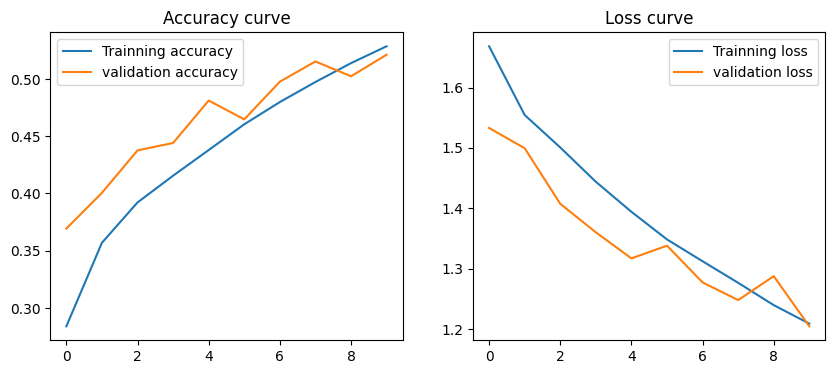

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title("Accuracy curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Trainning loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title("Loss curve")
plt.legend()


In [33]:
pred=model.predict(X_test)
print(pred)
y_pred=np.argmax(pred,axis=1)
y_pred_classes=np.argmax(y_test,axis=1)

y_pred_labels=label_encoder.inverse_transform(y_pred)
y_test_labels=label_encoder.inverse_transform(y_pred_classes)
df_pred = pd.DataFrame({
    'Predicted Labels': y_pred_labels,
    'Actual Labels': y_test_labels
})


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step
[[0.01438992 0.10844369 0.17819354 0.10123747 0.3923599  0.20537548]
 [0.08074294 0.2246203  0.10811679 0.22309993 0.28064692 0.08277316]
 [0.52238953 0.15694366 0.02898297 0.23758823 0.04314188 0.01095369]
 ...
 [0.00459864 0.065635   0.21259116 0.01890155 0.12887083 0.5694029 ]
 [0.01307021 0.11603159 0.06995479 0.03562479 0.40890348 0.35641518]
 [0.14679821 0.28119805 0.18394963 0.2558457  0.0639593  0.06824911]]


In [34]:
df_pred[1:20]

,Predicted Labels,Actual Labels
1,Neutral,Neutral
2,Angry,Happy
3,Sad,Fear
4,Angry,Happy
5,Angry,Angry
6,Angry,Angry
7,Sad,Fear
8,Sad,Sad
9,Neutral,Neutral
10,Angry,Angry


In [35]:
model.save(filepath=f"E:/final year project/models/model_{accuracy:.2f}.keras")
# model.save_weights(filepath=f"E:/final year project/models/model_{accuracy:.2f}.weights.h5")